In [31]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import defaultdict
import os
import seaborn as sns

In [40]:
benchmark_path = r"./framework_val_bechmark/results"
syn20_path = r"./framework_val_240429_143026/results"
syn30_path = r"./framework_val_240429_141127/results"

path = [benchmark_path, benchmark_path, syn20_path, syn30_path]

## gt_format = f"0_{}_hr.png"
## result_format = f"0_{}_sr.png"

rows = [1, 4, 8, 29]
cols = ["GT", "Benchmark", "SYN20", "SYN30"]

model_data = defaultdict(dict)

for i, c in enumerate(cols):
    for j, r in enumerate(rows):
        model_data[c][f"case_{j+1}"] = os.path.join(
            path[i], f"0_{r}_hr.png" if c == "GT" else f"0_{r}_sr.png"
        )

In [41]:
model_data

defaultdict(dict,
            {'GT': {'case_1': './framework_val_bechmark/results/0_1_hr.png',
              'case_2': './framework_val_bechmark/results/0_4_hr.png',
              'case_3': './framework_val_bechmark/results/0_8_hr.png',
              'case_4': './framework_val_bechmark/results/0_29_hr.png'},
             'Benchmark': {'case_1': './framework_val_bechmark/results/0_1_sr.png',
              'case_2': './framework_val_bechmark/results/0_4_sr.png',
              'case_3': './framework_val_bechmark/results/0_8_sr.png',
              'case_4': './framework_val_bechmark/results/0_29_sr.png'},
             'SYN20': {'case_1': './framework_val_240429_143026/results/0_1_sr.png',
              'case_2': './framework_val_240429_143026/results/0_4_sr.png',
              'case_3': './framework_val_240429_143026/results/0_8_sr.png',
              'case_4': './framework_val_240429_143026/results/0_29_sr.png'},
             'SYN30': {'case_1': './framework_val_240429_141127/results/0_1_

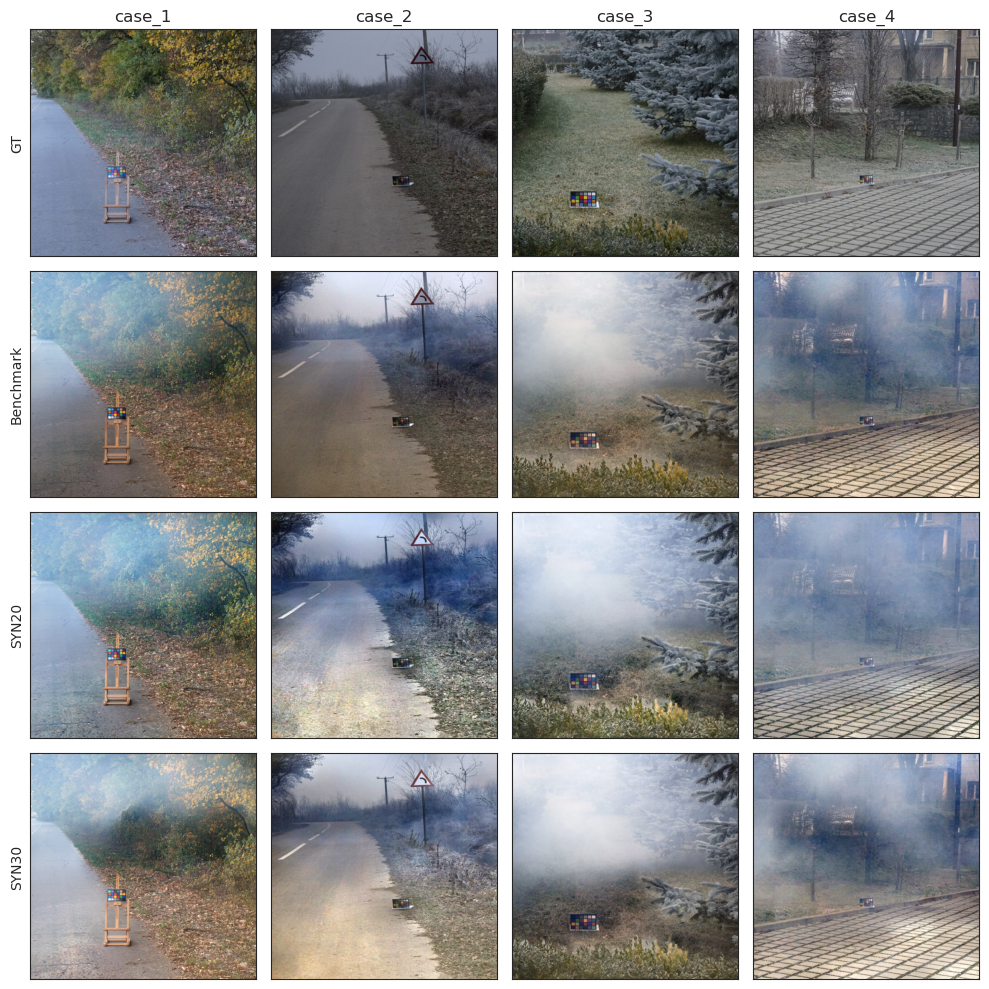

In [43]:
# 设置网格的大小和形状
num_rows = len(model_data)
num_cols = len(next(iter(model_data.values())))  # 假设每个模型具有相同数量的参数
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# 循环遍历每个模型和参数，并在网格中显示对应的图像
for i, (model, param_images) in enumerate(model_data.items()):
    for j, (param, image_path) in enumerate(param_images.items()):
        ax = axes[i, j] if num_rows > 1 else axes[j]
        # 在网格的左侧添加标签
        if j == 0:
            ax.set_ylabel(model)

        # 使用OpenCV读取图像数据
        image_array = cv2.imread(image_path)
        # OpenCV默认读取的图像颜色通道顺序为BGR，需要转换为RGB才能在Matplotlib中正确显示
        image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
        ax.imshow(image_array)

        if i == 0:
            ax.set_title(param)
        
        ax.set_xticks([])
        ax.set_yticks([])

# 调整子图之间的间距和布局
plt.tight_layout()
# 使用Seaborn设置样式
sns.set_style("white")
plt.show()